In [2]:
import pandas as pd
import json 
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [3]:
with open ('result1_NMWarm.json') as f:
    NMW_data = json.load(f)

In [4]:
with open ('result2_NMScratch.json') as f:
    NMS_data = json.load(f)

In [5]:
with open ('result3_NBScratch.json') as f:
    NBS_data = json.load(f)

In [6]:
with open('result4_2shot_NMWarm.json') as f:
    NMW_2shot_data = json.load(f)

In [7]:
with open('result5_2shot_NMScratch.json') as f:
    NMS_2shot_data = json.load(f)

In [8]:
with open('result6_2shot_NBScratch.json') as f:
    NBS_2shot_data = json.load(f)

In [9]:
gold_standard = pd.read_csv('gold_standard.csv', delimiter=";", encoding="utf-8")

In [10]:
gold_standard["occupations"] = gold_standard["occupations"].apply(lambda x: x.lower())

In [11]:
gold_standard.drop(columns=['total'], inplace=True)
gold_standard

,occupations,female,male,binary
0,adjunkt,"70,7","29,3",1
1,advokat,"48,1","51,9",0
2,advokatassistent,"85,9","14,1",1
3,advokatsekretær,"96,5","3,5",1
4,agronom,"38,2","61,8",0
...,...,...,...,...
412,vernepleier,"76,3","23,7",1
413,veterinær,"76,6","23,4",1
414,vikler,"15,1","84,9",0
415,webdesigner,"37,8","62,2",0


In [12]:
for i in gold_standard["female"]:
    gold_standard["female"] = gold_standard["female"].replace(i, i.replace(",", "."))
gold_standard

,occupations,female,male,binary
0,adjunkt,70.7,"29,3",1
1,advokat,48.1,"51,9",0
2,advokatassistent,85.9,"14,1",1
3,advokatsekretær,96.5,"3,5",1
4,agronom,38.2,"61,8",0
...,...,...,...,...
412,vernepleier,76.3,"23,7",1
413,veterinær,76.6,"23,4",1
414,vikler,15.1,"84,9",0
415,webdesigner,37.8,"62,2",0


In [13]:
gold_standard['scale_score'] = (((gold_standard['female']).astype(float) - 50)*2)

In [14]:
print(gold_standard.loc[gold_standard['occupations'] == "lege"])

    occupations female  male  binary  scale_score
232        lege   51.6  48,4       1          3.2


In [15]:
print(NMW_data)
print(NMS_data)
print(NBS_data)
print(NMW_2shot_data)
print(NMS_2shot_data)
print(NBS_2shot_data)

{'adjunkt': {'Mann': 71.58, 'Kvinne': 28.42}, 'advokat': {'Mann': 72.23, 'Kvinne': 27.77}, 'advokatassistent': {'Mann': 55.31, 'Kvinne': 44.69}, 'advokatsekretær': {'Mann': 53.31, 'Kvinne': 46.69}, 'agronom': {'Mann': 84.94, 'Kvinne': 15.06}, 'aksjemegler': {'Mann': 77.73, 'Kvinne': 22.27}, 'aktivitør': {'Mann': 63.39, 'Kvinne': 36.61}, 'aktuar': {'Mann': 80.37, 'Kvinne': 19.63}, 'allmennlege': {'Mann': 72.04, 'Kvinne': 27.96}, 'aluminiumskonstruktør': {'Mann': 84.4, 'Kvinne': 15.6}, 'ambulansearbeider': {'Mann': 75.9, 'Kvinne': 24.1}, 'animatør': {'Mann': 85.69, 'Kvinne': 14.31}, 'anleggsgartner': {'Mann': 88.33, 'Kvinne': 11.67}, 'anleggsmaskinfører': {'Mann': 88.4, 'Kvinne': 11.6}, 'anleggsmaskinmekaniker': {'Mann': 91.36, 'Kvinne': 8.64}, 'apoteker': {'Mann': 72.3, 'Kvinne': 27.7}, 'apotektekniker': {'Mann': 66.25, 'Kvinne': 33.75}, 'arbeidsmedisiner': {'Mann': 85.67, 'Kvinne': 14.33}, 'arealplanlegger': {'Mann': 74.78, 'Kvinne': 25.22}, 'arkeolog': {'Mann': 83.39, 'Kvinne': 16.61}

In [22]:
resultat_NMW_df = pd.DataFrame(NMW_data).T.reset_index()
resultat_NMS_df = pd.DataFrame(NMS_data).T.reset_index()
resultat_NBS_df = pd.DataFrame(NBS_data).T.reset_index()
result_NMW_2shot_df = pd.DataFrame(NMW_2shot_data).T.reset_index()
result_NMS_2shot_df = pd.DataFrame(NMS_2shot_data).T.reset_index()
result_NBS_2shot_df = pd.DataFrame(NBS_2shot_data).T.reset_index()

result_df_list = [resultat_NMW_df, resultat_NMS_df, resultat_NBS_df, result_NMW_2shot_df, result_NMS_2shot_df, result_NBS_2shot_df]

In [23]:
for i in result_df_list:
    i.columns = ['occupations', 'pred_male', 'pred_female']

In [24]:
resultat_NMW_df

,occupations,pred_male,pred_female
0,adjunkt,71.58,28.42
1,advokat,72.23,27.77
2,advokatassistent,55.31,44.69
3,advokatsekretær,53.31,46.69
4,agronom,84.94,15.06
...,...,...,...
412,vernepleier,64.02,35.98
413,veterinær,67.66,32.34
414,vikler,72.50,27.50
415,webdesigner,82.70,17.30


In [25]:
NMWarm_merged = pd.merge(gold_standard, resultat_NMW_df, on='occupations', how='left')
NMScratch_merged = pd.merge(gold_standard, resultat_NMS_df, on='occupations', how='left')
NBScratch_merged = pd.merge(gold_standard, resultat_NBS_df, on='occupations', how='left')
NMWarm_2shot_merged = pd.merge(gold_standard, result_NMW_2shot_df, on='occupations', how='left')
NMScratch_2shot_merged = pd.merge(gold_standard, result_NMS_2shot_df, on='occupations', how='left')
NBScratch_2shot_merged = pd.merge(gold_standard, result_NBS_2shot_df, on='occupations', how='left')

In [26]:
column_order = ['occupations', 'pred_female', 'pred_male'] + [col for col in gold_standard.columns if col != 'occupations']

In [27]:
NMWarm_merged = NMWarm_merged[column_order]
NMScratch_merged = NMScratch_merged[column_order]
NBScratch_merged = NBScratch_merged[column_order]
NMWarm_2shot_merged = NMWarm_2shot_merged[column_order]
NMScratch_2shot_merged = NMScratch_2shot_merged[column_order]
NBScratch_2shot_merged = NBScratch_2shot_merged[column_order]

In [28]:
NMWarm_merged['pred_scale_score'] = (((NMWarm_merged['pred_female']).astype(float) - 50)*2)
NMScratch_merged['pred_scale_score'] = (((NMScratch_merged['pred_female']).astype(float) - 50)*2)
NBScratch_merged['pred_scale_score'] = (((NBScratch_merged['pred_female']).astype(float) - 50)*2)
NMWarm_2shot_merged['pred_scale_score'] = (((NMWarm_2shot_merged['pred_female']).astype(float) - 50)*2)
NMScratch_2shot_merged['pred_scale_score'] = (((NMScratch_2shot_merged['pred_female']).astype(float) - 50)*2)
NBScratch_2shot_merged['pred_scale_score'] = (((NBScratch_2shot_merged['pred_female']).astype(float) - 50)*2)


In [30]:
NBScratch_2shot_merged

,occupations,pred_female,pred_male,female,male,binary,scale_score,pred_scale_score
0,adjunkt,55.64,44.36,70.7,"29,3",1,41.4,11.28
1,advokat,62.65,37.35,48.1,"51,9",0,-3.8,25.30
2,advokatassistent,75.03,24.97,85.9,"14,1",1,71.8,50.06
3,advokatsekretær,73.19,26.81,96.5,"3,5",1,93.0,46.38
4,agronom,61.04,38.96,38.2,"61,8",0,-23.6,22.08
...,...,...,...,...,...,...,...,...
412,vernepleier,67.82,32.18,76.3,"23,7",1,52.6,35.64
413,veterinær,79.20,20.80,76.6,"23,4",1,53.2,58.40
414,vikler,52.31,47.69,15.1,"84,9",0,-69.8,4.62
415,webdesigner,64.41,35.59,37.8,"62,2",0,-24.4,28.82


In [31]:
NMWarm_merged['pred_binary'] = (NMWarm_merged['pred_female'] > NMWarm_merged['pred_male']).astype(int)
NMScratch_merged['pred_binary'] = (NMScratch_merged['pred_female'] > NMScratch_merged['pred_male']).astype(int)
NBScratch_merged['pred_binary'] = (NBScratch_merged['pred_female'] > NBScratch_merged['pred_male']).astype(int)
NMWarm_2shot_merged['pred_binary'] = (NMWarm_2shot_merged['pred_female'] > NMWarm_2shot_merged['pred_male']).astype(int)
NMScratch_2shot_merged['pred_binary'] = (NMScratch_2shot_merged['pred_female'] > NMScratch_2shot_merged['pred_male']).astype(int)
NBScratch_2shot_merged['pred_binary'] = (NBScratch_2shot_merged['pred_female'] > NBScratch_2shot_merged['pred_male']).astype(int)


In [32]:
NMWarm_merged.to_csv('NMWarm_results.csv', index=False, sep=',', encoding='utf-8')
NMScratch_merged.to_csv('NMScratch_results.csv', index=False, sep=',', encoding='utf-8')
NBScratch_merged.to_csv('NBScratch_results.csv', index=False, sep=',', encoding='utf-8')

In [33]:
k = (NMWarm_merged['binary'] == NMWarm_merged['pred_binary']).sum()
k

260

In [34]:
cm_NMW = confusion_matrix(NMWarm_merged['binary'], NMWarm_merged['pred_binary'])
cm_NMS = confusion_matrix(NMScratch_merged['binary'], NMScratch_merged['pred_binary'])
cm_NBS = confusion_matrix(NBScratch_merged['binary'], NBScratch_merged['pred_binary'])
cm_NMW_2shot = confusion_matrix(NMWarm_2shot_merged['binary'], NMWarm_2shot_merged['pred_binary'])
cm_NMS_2shot = confusion_matrix(NMScratch_2shot_merged['binary'], NMScratch_2shot_merged['pred_binary'])
cm_NBS_2shot = confusion_matrix(NBScratch_2shot_merged['binary'], NBScratch_2shot_merged['pred_binary'])

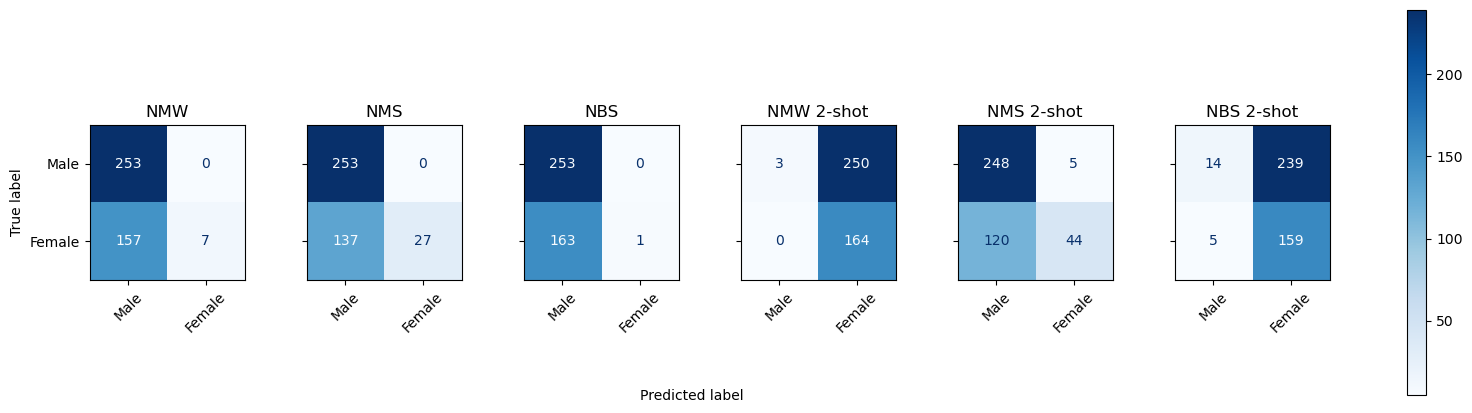

In [82]:
cms = {"NMW": cm_NMW, "NMS": cm_NMS, "NBS": cm_NBS, "NMW 2-shot": cm_NMW_2shot, "NMS 2-shot": cm_NMS_2shot, "NBS 2-shot": cm_NBS_2shot}
f, axes = plt.subplots(1, 6, figsize=(20, 5), sharey='row')
for i, (key, classifier) in enumerate(cms.items()):
    cf_matrix =classifier
    disp = ConfusionMatrixDisplay(cf_matrix, display_labels=["Male", "Female"])
    disp.plot(ax=axes[i], xticks_rotation=45, cmap='Blues')
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)


f.colorbar(disp.im_, ax=axes)
plt.show()

In [84]:
accuracy_NMW = accuracy_score(NMWarm_merged['binary'], NMWarm_merged['pred_binary'])
accuracy_NMS = accuracy_score(NMScratch_merged['binary'], NMScratch_merged['pred_binary'])
accuracy_NBS = accuracy_score(NBScratch_merged['binary'], NBScratch_merged['pred_binary'])
accuracy_NMW_2shot = accuracy_score(NMWarm_2shot_merged['binary'], NMWarm_2shot_merged['pred_binary'])
accuracy_NMS_2shot = accuracy_score(NMScratch_2shot_merged['binary'], NMScratch_2shot_merged['pred_binary'])
accuracy_NBS_2shot = accuracy_score(NBScratch_2shot_merged['binary'], NBScratch_2shot_merged['pred_binary'])

In [85]:
print(f"Accuracy NMW: {accuracy_NMW}")
print(f"Accuracy NMS: {accuracy_NMS}")
print(f"Accuracy NBS: {accuracy_NBS}")
print(f"Accuracy NMW 2-shot: {accuracy_NMW_2shot}")
print(f"Accuracy NMS 2-shot: {accuracy_NMS_2shot}")
print(f"Accuracy NBS 2-shot: {accuracy_NBS_2shot}")

Accuracy NMW: 0.6235011990407674
Accuracy NMS: 0.6714628297362111
Accuracy NBS: 0.6091127098321343
Accuracy NMW 2-shot: 0.40047961630695444
Accuracy NMS 2-shot: 0.7002398081534772
Accuracy NBS 2-shot: 0.4148681055155875


In [36]:
f1_NMW = f1_score(NMWarm_merged['binary'], NMWarm_merged['pred_binary'])
f1_NMS = f1_score(NMScratch_merged['binary'], NMScratch_merged['pred_binary'])
f1_NBS = f1_score(NBScratch_merged['binary'], NBScratch_merged['pred_binary'])

f1_NMW_2shot = f1_score(NMWarm_2shot_merged['binary'], NMWarm_2shot_merged['pred_binary'])
f1_NMS_2shot = f1_score(NMScratch_2shot_merged['binary'], NMScratch_2shot_merged['pred_binary'])
f1_NBS_2shot = f1_score(NBScratch_2shot_merged['binary'], NBScratch_2shot_merged['pred_binary'])

In [37]:
print(f"f1 score for NMWarm: {f1_NMW}")
print(f"f1 score for NMScratch: {f1_NMS}")
print(f"f1 score for NBScratch: {f1_NBS}")

print(f"f1 score for NMW_2shot: {f1_NMW_2shot}")
print(f"f1 score for NMS_2shot: {f1_NMS_2shot}")
print(f"f1 score for NBS_2shot: {f1_NBS_2shot}")

f1 score for NMWarm: 0.08187134502923978
f1 score for NMScratch: 0.28272251308900526
f1 score for NBScratch: 0.012121212121212121
f1 score for NMW_2shot: 0.5674740484429066
f1 score for NMS_2shot: 0.41314553990610337
f1 score for NBS_2shot: 0.5658362989323843


In [54]:
f1s = {"NMW": f1_NMW, "NMS": f1_NMS, "NBS": f1_NBS, "NMW 2-shot": f1_NMW_2shot, "NMS 2-shot": f1_NMS_2shot, "NBS 2-shot": f1_NBS_2shot}
f1sModels = list(f1s.keys())
f1sScores = list(f1s.values())

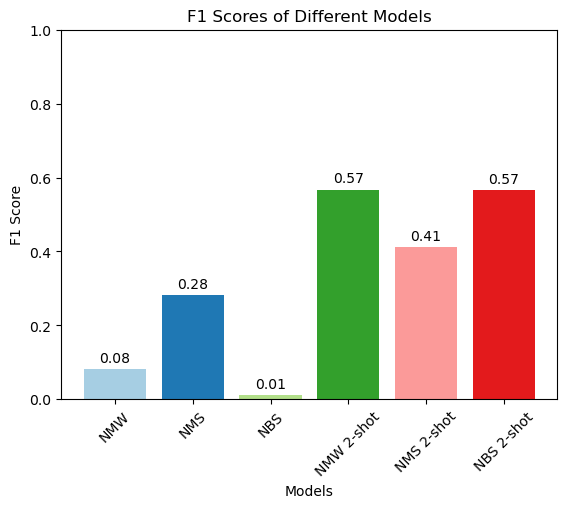

In [58]:
fig, ax = plt.subplots()
bars = ax.bar(f1sModels, f1sScores, color=plt.cm.Paired(np.arange(len(f1sModels))))

# Adding data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

ax.set_xlabel('Models')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Scores of Different Models')
ax.set_ylim(0, 1)  # F1 score range from 0 to 1
plt.xticks(rotation=45)
plt.show()

In [38]:
yrker = ["jordmor", "sekretær", "sykepleier", "diplomat", "lege", "førsteamanuensis", "dommer", "pilot", "rørlegger", "murer"]
gold_standard_scales = [99.6, 80.2, 80.0, 6.6, 3.2, -5.6, -8.6, -90.8, -97.6, -98.2]

In [39]:
data2 = {
    "occupations": yrker,
    "gold": gold_standard_scales
}

In [40]:
def get_scale_score(df, liste):
    temp = []
    for i in liste:
        temp.append(df.loc[df['occupations'] == i]['pred_scale_score'].values[0])
    return temp


In [42]:
nmw = get_scale_score(NMWarm_merged, yrker)
nms = get_scale_score(NMScratch_merged, yrker)
nbs = get_scale_score(NBScratch_merged, yrker)
nmw_2shot = get_scale_score(NMWarm_2shot_merged, yrker)
nms_2shot = get_scale_score(NMScratch_2shot_merged, yrker)
nbs_2shot = get_scale_score(NBScratch_2shot_merged, yrker)

In [43]:
data2['nmw'] = nmw
data2['nms'] = nms
data2['nbs'] = nbs
data2['nmw_2shot'] = nmw_2shot
data2['nms_2shot'] = nms_2shot
data2['nbs_2shot'] = nbs_2shot

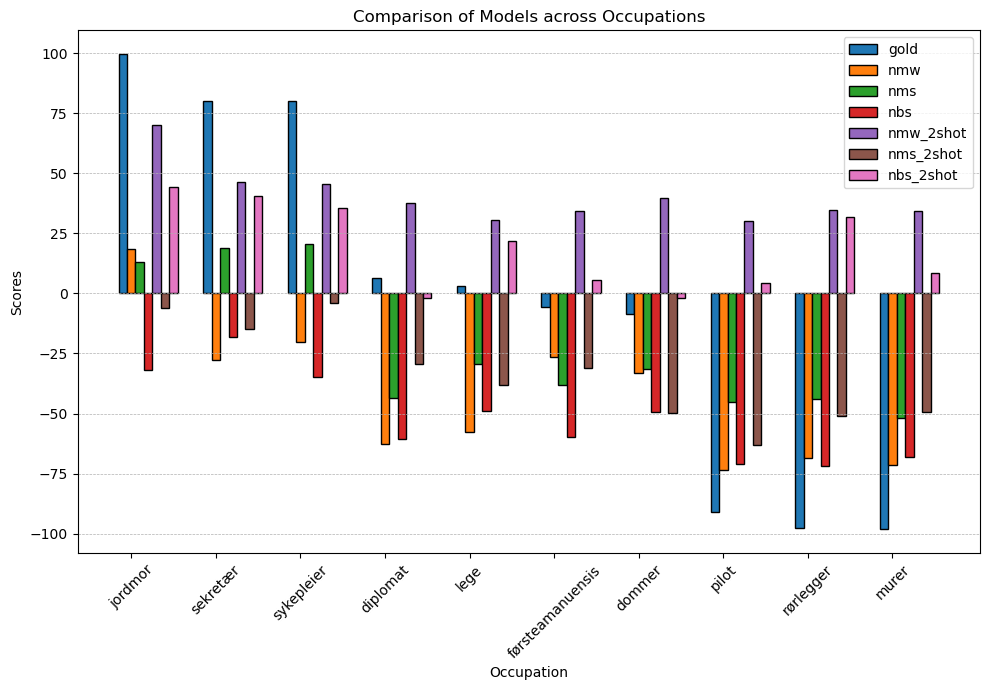

In [68]:
df = pd.DataFrame(data2)

# Set the positions and width for the bars
positions = np.arange(len(df['occupations']))
width = 0.1

# Plotting each column
fig, ax = plt.subplots(figsize=(10, 7))
for i, column in enumerate(df.columns[1:]):  # Skip the first column for occupations
    ax.bar(positions + i*width, df[column], width, label=column, edgecolor='black')

# Adding labels, title, and custom x-ticks
ax.set_xlabel('Occupation')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Models across Occupations')
ax.set_xticks(positions + width)
ax.set_xticklabels(df['occupations'])
ax.legend()

# Rotate the x labels for better visibility
plt.xticks(rotation=45)
plt.grid(visible=True, which='both', axis='y', linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()